In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import qgrid
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Mission n° 2
Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

Vous devrez y utiliser au moins :

des indicateurs de tendance centrale et de dispersion ; une analyse de concentration, via une courbe de Lorenz et un indice de Gini ; des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ; des analyses bivariées.

# - Analyse donnée

In [2]:
# Télécharger les tables avec et sans outliers atypiques ('c_1609', 'c_4958', 'c_6714', 'c_3454')
data_final1 = pd.read_csv('data_final1.csv') #(avec outliers)
data_final2 = pd.read_csv('data_final2.csv') #(sans outliers)

In [3]:
# Table finale aprés merge toutes les tables 
data_final1.head()

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine,price,categ,categ_object,sex,birth,sex_binaire,age,mois_object,tranche_age
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28,2021-04-10 00:00:00,18,2021,4,10,samedi,4.99,0,categ0,f,1977,0,44,avril,30-50 ans
1,2_226,s_159142,c_277,2022-02-03 01:55:53,2022-02-03 00:00:00,1,2022,2,3,jeudi,65.75,2,categ2,f,2000,0,22,février,17-30 ans
2,1_374,s_94290,c_4270,2021-09-23 15:13:46,2021-09-23 00:00:00,15,2021,9,23,jeudi,10.71,1,categ1,f,1979,0,42,septembre,30-50 ans
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17 00:00:00,3,2021,10,17,dimanche,4.20,0,categ0,m,1963,1,58,octobre,50-93ans
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25,2021-07-17 00:00:00,20,2021,7,17,samedi,8.99,0,categ0,f,1980,0,41,juillet,30-50 ans


In [4]:
# Dimension du dataframe 
data_final1.shape

(336713, 19)

In [5]:
# Convertir colonne en datetime
data_final1['date'] = pd.to_datetime(data_final1['date'])
data_final1['datetime'] = pd.to_datetime(data_final1['datetime'])

In [6]:
#Voir les types des variables
data_final1.dtypes

id_prod                 object
session_id              object
client_id               object
date            datetime64[ns]
datetime        datetime64[ns]
heure                    int64
annee                    int64
mois                     int64
jour                     int64
jour_semaine            object
price                  float64
categ                    int64
categ_object            object
sex                     object
birth                    int64
sex_binaire              int64
age                      int64
mois_object             object
tranche_age             object
dtype: object

In [7]:
# Compter le types de variables 
data_final1.dtypes.value_counts()

int64             8
object            8
datetime64[ns]    2
float64           1
dtype: int64

# Statistiques descriptives univariée

In [8]:
# Description variable numérique (mesure centrale, dispersion, forme)

from IPython.display import Markdown

quanti =['age', 'price', 'heure', 'mois', 'jour']
for v in quanti:
    

    display (Markdown('Les mesures tendance centrale <span style="color: #ff0000">{}</span>'.format(v)))
    print("moyenne:\n",data_final1[v].mean()) 
    print("mediane:\n",data_final1[v].median())
    print("mode:\n",data_final1[v].mode())
    display (Markdown('Les mesures de dispersion <span style="color: #ff0000">{}</span>'.format(v)))
    print("variance:\n",data_final1[v].var())
    print("écart type:\n",data_final1[v].std())
    display (Markdown('Les mesures de forme <span style="color: #ff0000">{}</span>'.format(v)))
    print("skewness:\n",data_final1[v].skew()) 
    print("kurtosis:\n",data_final1[v].kurtosis()) 

    display (Markdown('Description <span style="color: #ff0000">{}</span>'.format(v)))
    print("describe:\n",data_final1[v].describe())
    print()




Les mesures tendance centrale <span style="color: #ff0000">age</span>

moyenne:
 43.351260569089995
mediane:
 42.0
mode:
 0    41
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">age</span>

variance:
 183.13164071207683
écart type:
 13.532613964496173


Les mesures de forme <span style="color: #ff0000">age</span>

skewness:
 0.5815895457829384
kurtosis:
 0.4519406749408188


Description <span style="color: #ff0000">age</span>

describe:
 count    336713.000000
mean         43.351261
std          13.532614
min          17.000000
25%          34.000000
50%          42.000000
75%          51.000000
max          93.000000
Name: age, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">price</span>

moyenne:
 17.215188513733644
mediane:
 13.9
mode:
 0    15.99
dtype: float64


Les mesures de dispersion <span style="color: #ff0000">price</span>

variance:
 318.81692963436547
écart type:
 17.855445377653435


Les mesures de forme <span style="color: #ff0000">price</span>

skewness:
 5.479196379351585
kurtosis:
 45.425204844708766


Description <span style="color: #ff0000">price</span>

describe:
 count    336713.000000
mean         17.215189
std          17.855445
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">heure</span>

moyenne:
 11.513686730242076
mediane:
 12.0
mode:
 0    9
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">heure</span>

variance:
 47.88045918973621
écart type:
 6.919570737389438


Les mesures de forme <span style="color: #ff0000">heure</span>

skewness:
 -0.0023220332207195085
kurtosis:
 -1.202798424032978


Description <span style="color: #ff0000">heure</span>

describe:
 count    336713.000000
mean         11.513687
std           6.919571
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: heure, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">mois</span>

moyenne:
 6.482143546581213
mediane:
 6.0
mode:
 0    9
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">mois</span>

variance:
 12.389302692123541
écart type:
 3.5198441289528066


Les mesures de forme <span style="color: #ff0000">mois</span>

skewness:
 0.02656880986955627
kurtosis:
 -1.2504318821033535


Description <span style="color: #ff0000">mois</span>

describe:
 count    336713.000000
mean          6.482144
std           3.519844
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: mois, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">jour</span>

moyenne:
 15.801786684802785
mediane:
 16.0
mode:
 0    28
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">jour</span>

variance:
 77.7645407503465
écart type:
 8.818420536034019


Les mesures de forme <span style="color: #ff0000">jour</span>

skewness:
 -0.002493769939187886
kurtosis:
 -1.1961889300139845


Description <span style="color: #ff0000">jour</span>

describe:
 count    336713.000000
mean         15.801787
std           8.818421
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: jour, dtype: float64



In [9]:
# Description variable object

display (Markdown('Description <span style="color: #ff0000">id_prod</span>'))
print(data_final1['id_prod'].describe())

display (Markdown('Description <span style="color: #ff0000">session_id</span>'))
print(data_final1['session_id'].describe())

display (Markdown('Description <span style="color: #ff0000">client_id</span>'))
print(data_final1['client_id'].describe())

display (Markdown('Description <span style="color: #ff0000">jour_semaine</span>'))
print(data_final1['jour_semaine'].describe())

display (Markdown('Description <span style="color: #ff0000">categ_object</span>'))
print(data_final1['categ_object'].describe())

display (Markdown('Description <span style="color: #ff0000">sex</span>'))
print(data_final1['sex'].describe())

display (Markdown('Description <span style="color: #ff0000">mois_object</span>'))
print(data_final1['mois_object'].describe())


display (Markdown('Description <span style="color: #ff0000">tranche_age</span>'))
print(data_final1['tranche_age'].describe())

Description <span style="color: #ff0000">id_prod</span>

count     336713
unique      3264
top        1_369
freq        1081
Name: id_prod, dtype: object


Description <span style="color: #ff0000">session_id</span>

count       336713
unique      169173
top       s_118668
freq            14
Name: session_id, dtype: object


Description <span style="color: #ff0000">client_id</span>

count     336713
unique      8600
top       c_1609
freq       12855
Name: client_id, dtype: object


Description <span style="color: #ff0000">jour_semaine</span>

count     336713
unique         7
top        lundi
freq       48809
Name: jour_semaine, dtype: object


Description <span style="color: #ff0000">categ_object</span>

count     336713
unique         3
top       categ0
freq      209426
Name: categ_object, dtype: object


Description <span style="color: #ff0000">sex</span>

count     336713
unique         2
top            m
freq      169198
Name: sex, dtype: object


Description <span style="color: #ff0000">mois_object</span>

count        336713
unique           12
top       septembre
freq          33254
Name: mois_object, dtype: object


Description <span style="color: #ff0000">tranche_age</span>

count         336713
unique             3
top       30-50 ans 
freq          205768
Name: tranche_age, dtype: object


In [10]:
# Description Datetime64
display (Markdown('Description <span style="color: #ff0000">date</span>'))
print(data_final1['date'].describe())

Description <span style="color: #ff0000">date</span>

count                  336713
unique                 334892
top       2021-05-22 12:54:05
freq                        3
first     2021-03-01 00:01:07
last      2022-02-28 23:59:58
Name: date, dtype: object


### Les mesures sans les clients outliers atypiques 
#'c_1609', 'c_4958', 'c_6714', 'c_3454'

In [11]:
from IPython.display import Markdown

quanti =['age', 'price', 'heure', 'mois', 'jour']
for v in quanti:
    

    display (Markdown('Les mesures tendance centrale <span style="color: #ff0000">{}</span>'.format(v)))
    print("moyenne:\n",data_final2[v].mean()) 
    print("mediane:\n",data_final2[v].median())
    print("mode:\n",data_final2[v].mode())
    display (Markdown('Les mesures de dispersion <span style="color: #ff0000">{}</span>'.format(v)))
    print("variance:\n",data_final2[v].var())
    print("écart type:\n",data_final2[v].std())
    display (Markdown('Les mesures de forme <span style="color: #ff0000">{}</span>'.format(v)))
    print("skewness:\n",data_final2[v].skew()) 
    print("kurtosis:\n",data_final2[v].kurtosis()) 

    display (Markdown('Description <span style="color: #ff0000">{}</span>'.format(v)))
    print("describe:\n",data_final2[v].describe())
    print()


Les mesures tendance centrale <span style="color: #ff0000">age</span>

moyenne:
 43.381655993264275
mediane:
 42.0
mode:
 0    42
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">age</span>

variance:
 190.60555574351076
écart type:
 13.805997093419611


Les mesures de forme <span style="color: #ff0000">age</span>

skewness:
 0.6032774440037256
kurtosis:
 0.3659596339695561


Description <span style="color: #ff0000">age</span>

describe:
 count    313552.000000
mean         43.381656
std          13.805997
min          17.000000
25%          34.000000
50%          42.000000
75%          50.000000
max          93.000000
Name: age, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">price</span>

moyenne:
 17.102978006907307
mediane:
 13.83
mode:
 0    15.99
dtype: float64


Les mesures de dispersion <span style="color: #ff0000">price</span>

variance:
 309.64893891995155
écart type:
 17.59684457281906


Les mesures de forme <span style="color: #ff0000">price</span>

skewness:
 5.541002450402671
kurtosis:
 46.655005197796555


Description <span style="color: #ff0000">price</span>

describe:
 count    313552.000000
mean         17.102978
std          17.596845
min           0.620000
25%           8.580000
50%          13.830000
75%          18.990000
max         300.000000
Name: price, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">heure</span>

moyenne:
 11.515739016175946
mediane:
 12.0
mode:
 0    19
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">heure</span>

variance:
 47.92699856787719
écart type:
 6.922932801051675


Les mesures de forme <span style="color: #ff0000">heure</span>

skewness:
 -0.0027139407978050444
kurtosis:
 -1.2038173543345492


Description <span style="color: #ff0000">heure</span>

describe:
 count    313552.000000
mean         11.515739
std           6.922933
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: heure, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">mois</span>

moyenne:
 6.4791294585906005
mediane:
 6.0
mode:
 0    9
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">mois</span>

variance:
 12.390811775982087
écart type:
 3.5200584904205905


Les mesures de forme <span style="color: #ff0000">mois</span>

skewness:
 0.02723295915596712
kurtosis:
 -1.2499346040331152


Description <span style="color: #ff0000">mois</span>

describe:
 count    313552.000000
mean          6.479129
std           3.520058
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: mois, dtype: float64



Les mesures tendance centrale <span style="color: #ff0000">jour</span>

moyenne:
 15.807138847782824
mediane:
 16.0
mode:
 0    28
dtype: int64


Les mesures de dispersion <span style="color: #ff0000">jour</span>

variance:
 77.8805020567551
écart type:
 8.82499303437431


Les mesures de forme <span style="color: #ff0000">jour</span>

skewness:
 -0.0028349552019082246
kurtosis:
 -1.1982111134203137


Description <span style="color: #ff0000">jour</span>

describe:
 count    313552.000000
mean         15.807139
std           8.824993
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: jour, dtype: float64



In [12]:
# Description variable object sans les clients outliers atypiques 
#'c_1609', 'c_4958', 'c_6714', 'c_3454'

display (Markdown('Description <span style="color: #ff0000">id_prod</span>'))
print(data_final2['id_prod'].describe())

display (Markdown('Description <span style="color: #ff0000">session_id</span>'))
print(data_final2['session_id'].describe())

display (Markdown('Description <span style="color: #ff0000">client_id</span>'))
print(data_final2['client_id'].describe())

display (Markdown('Description <span style="color: #ff0000">jour_semaine</span>'))
print(data_final2['jour_semaine'].describe())

display (Markdown('Description <span style="color: #ff0000">categ_object</span>'))
print(data_final2['categ_object'].describe())

display (Markdown('Description <span style="color: #ff0000">sex</span>'))
print(data_final2['sex'].describe())

display (Markdown('Description <span style="color: #ff0000">mois_object</span>'))
print(data_final2['mois_object'].describe())

Description <span style="color: #ff0000">id_prod</span>

count     313552
unique      3261
top        1_369
freq        1015
Name: id_prod, dtype: object


Description <span style="color: #ff0000">session_id</span>

count       313552
unique      157789
top       s_118668
freq            14
Name: session_id, dtype: object


Description <span style="color: #ff0000">client_id</span>

count     313552
unique      8596
top       c_7959
freq         195
Name: client_id, dtype: object


Description <span style="color: #ff0000">jour_semaine</span>

count     313552
unique         7
top        lundi
freq       45391
Name: jour_semaine, dtype: object


Description <span style="color: #ff0000">categ_object</span>

count     313552
unique         3
top       categ0
freq      195171
Name: categ_object, dtype: object


Description <span style="color: #ff0000">sex</span>

count     313552
unique         2
top            f
freq      163044
Name: sex, dtype: object


Description <span style="color: #ff0000">mois_object</span>

count        313552
unique           12
top       septembre
freq          30919
Name: mois_object, dtype: object


In [13]:
# categ 0 sans les outliers atypiques 
#'c_1609', 'c_4958', 'c_6714', 'c_3454'

categ_outliers0 = data_final2[data_final2['categ']==0]
categ_outliers0.describe()[['price']]

,price
count,195171.000000
mean,10.645050
std,4.928149
min,0.620000
25%,6.300000
50%,9.990000
75%,14.450000
max,40.990000


In [14]:
# categ 1 sans les outliers atypiques 
#'c_1609', 'c_4958', 'c_6714', 'c_3454'
categ_outliers1 = data_final2[data_final2['categ']==1]
categ_outliers1.describe()[['price']]

,price
count,102625.000000
mean,20.478298
std,7.571942
min,2.000000
25%,15.810000
50%,19.080000
75%,24.980000
max,80.990000


In [15]:
# categ 2 sans les outliers atypiques 
#'c_1609', 'c_4958', 'c_6714', 'c_3454'
categ_outliers2 = data_final2[data_final2['categ']==2]
categ_outliers2.describe()[['price']]

,price
count,15756.000000
mean,75.113138
std,39.140493
min,30.990000
25%,53.990000
50%,62.540000
75%,69.990000
max,300.000000


# Courbe lorenz et indice de gini (client_id)

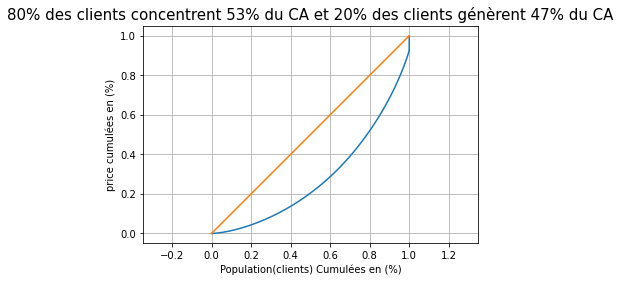

In [16]:
#Groupby par client_id avec agg sum

client_répartition = data_final1[['client_id', 'price']].groupby('client_id').sum()

# Courbe lorenz
 
dep = client_répartition['price'].values# les valeurs des clients
n = len(dep) # le nombre de valeurs
lorenz = np.cumsum(np.sort(dep)) / dep.sum() #trie des valeurs et cummule / par la somme des valeurs
lorenz = np.append([0],lorenz) # Courbe commence 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot ([ 0 , 1 ], [ 0 , 1 ]) # bissectrice

plt.title('80% des clients concentrent 53% du CA et 20% des clients génèrent 47% du CA', size=15)
plt.grid(True)# grille
plt.xlabel('Population(clients) Cumulées en (%)')
plt.ylabel('price cumulées en (%)')
plt.show()

#80% des clients concentrent 53% du CA et 20% des clients génèrent 47% du CA

In [17]:
#indice de gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

#0= parfait égale
#1= inégale


0.43970990702750723

# courbe lorenz et indice de gini (id_prod)

In [18]:
# groupby id_prod avec  agg sum
produit_répartition = data_final1[['id_prod', 'price']].groupby('id_prod').sum()
produit_répartition.reset_index().sort_values(by='price', ascending=False).head(30)

,id_prod,price
3069,2_135,33874.09
3044,2_112,31960.61
3033,2_102,28919.46
3151,2_209,27296.10
3042,2_110,27016.50
2590,1_369,25933.19
2618,1_395,25830.09
3103,2_166,25534.44
3205,2_43,25266.39
3200,2_39,25225.65


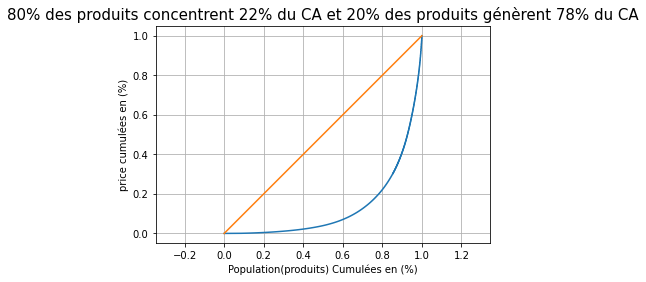

In [19]:
# Courbe Lorenz
dep = produit_répartition['price'].values # Valeur des id_prod
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum() #trie des valeurs et cummule / par la somme des valeurs
lorenz = np.append([0],lorenz) # Courbe commence 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)  #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot ([ 0 , 1 ], [ 0 , 1 ]) #bissectrice
plt.title('80% des produits concentrent 22% du CA et 20% des produits génèrent 78% du CA', size=15)
plt.xlabel('Population(produits) Cumulées en (%)')
plt.ylabel('price cumulées en (%)')
plt.grid(True)# grille
plt.show()

In [20]:
# indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini 
#0= parfait égale
#1= inégale 

0.7385282730856771

In [21]:
#Sélectionner les variables Int et float
numerical_features = data_final1.select_dtypes(include='number')
numerical_features2 = numerical_features[['heure','annee','mois','jour', 'categ', 'sex_binaire']]
numerical_features2.head()

,heure,annee,mois,jour,categ,sex_binaire
0,18,2021,4,10,0,0
1,1,2022,2,3,2,0
2,15,2021,9,23,1,0
3,3,2021,10,17,0,1
4,20,2021,7,17,0,0


In [22]:
numerical_features1 = numerical_features[['price', 'age']]
numerical_features1.head()

,price,age
0,4.99,44
1,65.75,22
2,10.71,42
3,4.20,58
4,8.99,41


In [23]:
#### Séléctionner les variables objects
object_features = data_final1.select_dtypes(include=object)
object_features.head(1)

,id_prod,session_id,client_id,jour_semaine,categ_object,sex,mois_object,tranche_age
0,0_1483,s_18746,c_4450,samedi,categ0,f,avril,30-50 ans


In [24]:
#### Séléctionner les variables objects avec peu de catégorie 
objects_features1 = object_features[['jour_semaine', 'categ_object', 'sex', 'mois_object']]
objects_features1.head(1)

,jour_semaine,categ_object,sex,mois_object
0,samedi,categ0,f,avril


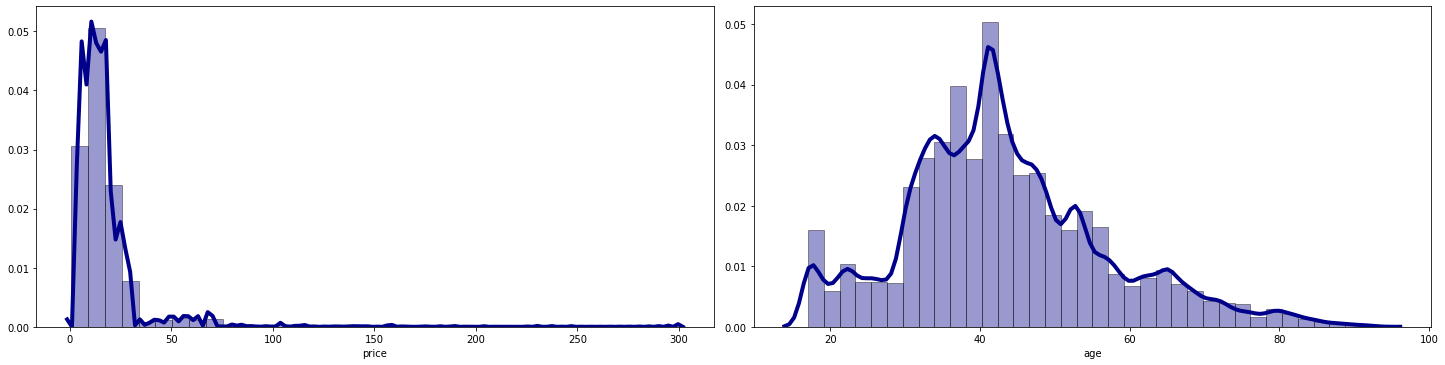

In [25]:
# Tracer displot pour les variables Int et float (numérique)

fig = plt.figure(figsize=(40,45))
for i in range(len(numerical_features1.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features1.iloc[:,i], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel(numerical_features1.columns[i])
plt.tight_layout()
plt.show()

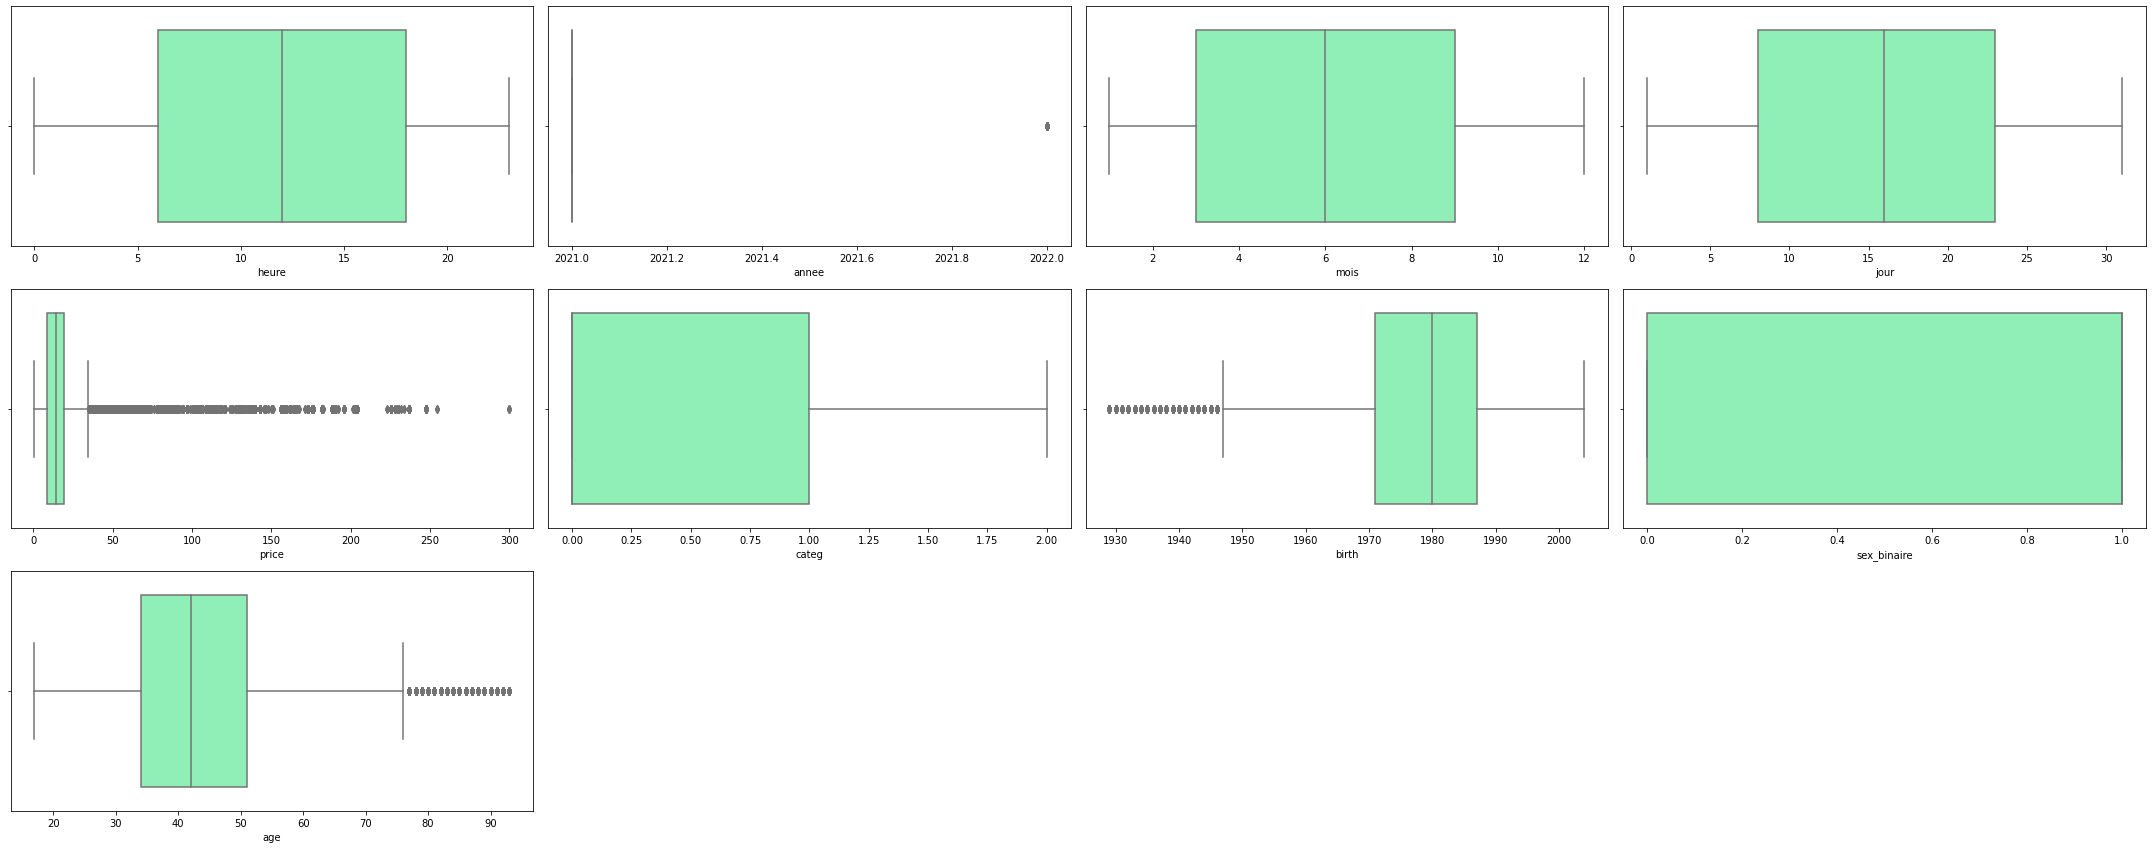

In [26]:
# Tracer boxplot pour les variables Int et float (numérique)

fig = plt.figure(figsize=(30,35))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    
    sns.boxplot(y=numerical_features.iloc[:,i], palette='rainbow',orient='h')

plt.tight_layout()
plt.show()

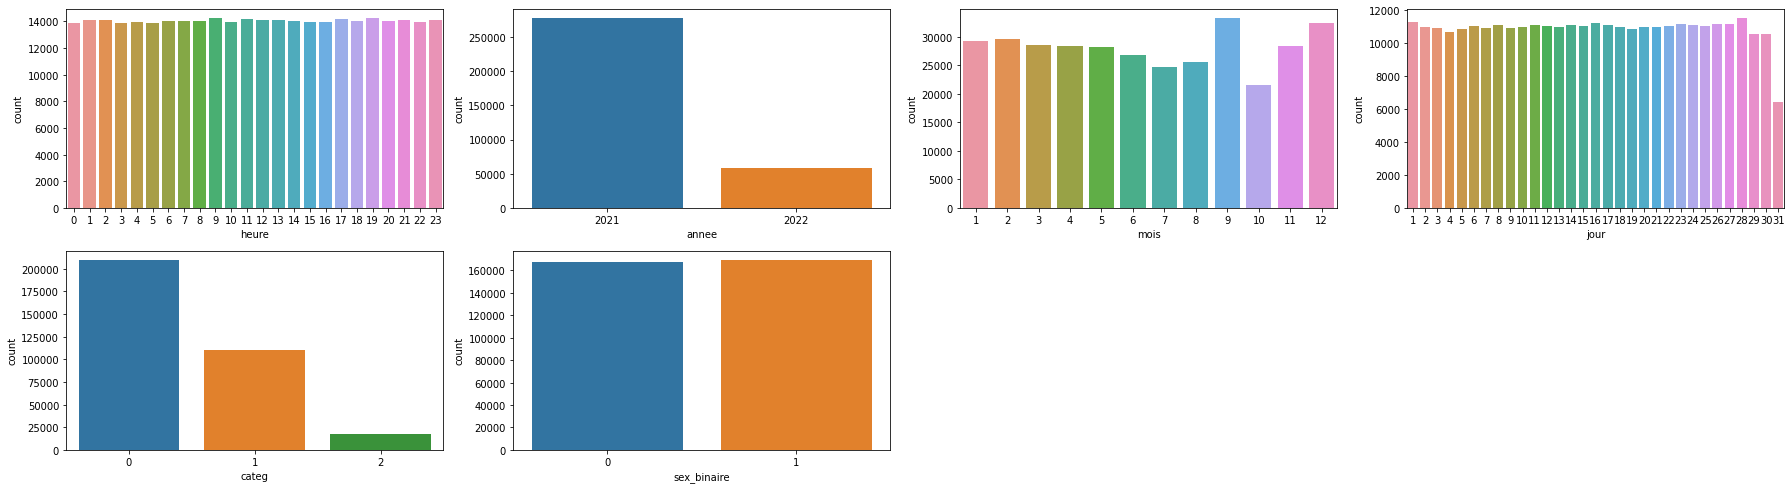

In [27]:
#Tracer countplot pour les variables Int (numérique)
fig = plt.figure(figsize=(25,30))
for i in range(len(numerical_features2.columns)):
    fig.add_subplot(9,4,i+1)
    sns.countplot(numerical_features2.iloc[:,i])
    plt.xlabel(numerical_features2.columns[i])
plt.tight_layout()
plt.show()

In [28]:
#la Fréquence achat par heure 
display (Markdown('Le nombre d achats selon les heures par ordre décroissant <span style="color: #ff0000">(heure)</span>'))
pd.crosstab(numerical_features['heure'], 'freq').reset_index().rename_axis(None, axis=1).sort_values(by='freq', ascending=False)


Le nombre d achats selon les heures par ordre décroissant <span style="color: #ff0000">(heure)</span>

,heure,freq
9,9,14243
19,19,14221
17,17,14162
11,11,14131
2,2,14116
1,1,14111
23,23,14103
12,12,14082
21,21,14080
13,13,14073


In [29]:
#la fréquence achat par année
display (Markdown('Le nombre d achats selon l année  par ordre décroissant <span style="color: #ff0000">(annee)</span>'))
pd.crosstab(numerical_features['annee'], 'freq').reset_index().rename_axis(None, axis=1).sort_values(by='freq', ascending=False)

Le nombre d achats selon l année  par ordre décroissant <span style="color: #ff0000">(annee)</span>

,annee,freq
0,2021,277846
1,2022,58867


In [30]:
#la fréquence achat par mois
display (Markdown('Le nombre d achats par mois  par ordre décroissant <span style="color: #ff0000">(mois)</span>'))
pd.crosstab(numerical_features['mois'], 'freq').reset_index().rename_axis(None, axis=1).sort_values(by='freq', ascending=False).head()

Le nombre d achats par mois  par ordre décroissant <span style="color: #ff0000">(mois)</span>

,mois,freq
8,9,33254
11,12,32417
1,2,29556
0,1,29311
2,3,28559


In [31]:
#la fréquence achat par age
display (Markdown('Le nombre d achats selon l age des clients par ordre décroissant <span style="color: #ff0000">(age)</span>'))
pd.crosstab(numerical_features['age'], 'freq').reset_index().rename_axis(None, axis=1).sort_values(by='freq', ascending=False).head()

Le nombre d achats selon l age des clients par ordre décroissant <span style="color: #ff0000">(age)</span>

,age,freq
24,41,21406
25,42,14418
26,43,12169
16,33,11689
18,35,11524


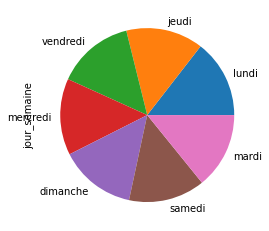

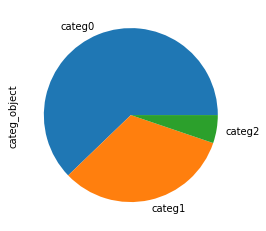

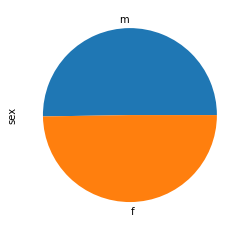

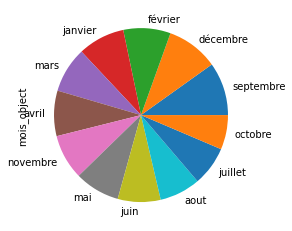

In [32]:
for col in objects_features1.select_dtypes('object'):
    plt.figure()
    objects_features1[col].value_counts().plot.pie()

In [33]:
# La fréquence d’achats selon les jours de le semaine
display (Markdown('Le nombre d achats selon les jours de la semaine par ordre décroissant <span style="color: #ff0000">(jour_semaine)</span>'))
pd.crosstab(data_final1['jour_semaine'], 'freq').reset_index().rename_axis(None, axis=1).sort_values(by='freq', ascending=False)

Le nombre d achats selon les jours de la semaine par ordre décroissant <span style="color: #ff0000">(jour_semaine)</span>

,jour_semaine,freq
2,lundi,48809
1,jeudi,48428
6,vendredi,48329
4,mercredi,47853
0,dimanche,47810
5,samedi,47767
3,mardi,47717


Text(0.5, 1.0, "La fréquence d'achat pour les jours de la semaine")

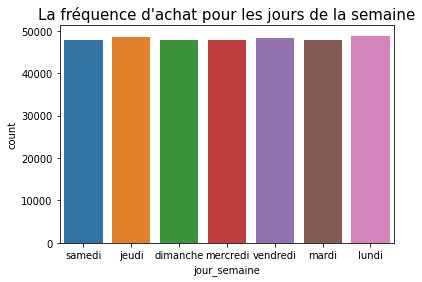

In [34]:
sns.countplot(x='jour_semaine',data=data_final1)
plt.title("La fréquence d'achat pour les jours de la semaine", size=15)

In [35]:
# Le fréquence d'achats selon les catégories
display (Markdown('Le nombre d achat selon les catégorie par ordre décroissant <span style="color: #ff0000">(categ_object)</span>'))
pd.crosstab(data_final1['categ_object'], 'freq').reset_index().rename_axis(None, axis=1).sort_values(by='freq', ascending=False)

Le nombre d achat selon les catégorie par ordre décroissant <span style="color: #ff0000">(categ_object)</span>

,categ_object,freq
0,categ0,209426
1,categ1,109735
2,categ2,17552


Text(0.5, 1.0, "La fréquence d'achat pour les catégories des clients")

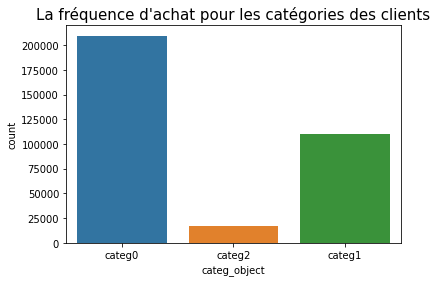

In [36]:
sns.countplot(x='categ_object',data=data_final1)
plt.title("La fréquence d'achat pour les catégories des clients", size=15)

In [37]:
# Le fréquence d'achats selon le sex des clients
display (Markdown('Le nombre d achat selon le sex par ordre décroissant <span style="color: #ff0000">(sex)</span>'))
pd.crosstab(data_final1['sex'], 'freq').rename_axis(None, axis=1).sort_values(by='freq', ascending=False)


Le nombre d achat selon le sex par ordre décroissant <span style="color: #ff0000">(sex)</span>

,freq
sex,
m,169198
f,167515


Text(0.5, 1.0, "La fréquence d'achat pour les sex des clients")

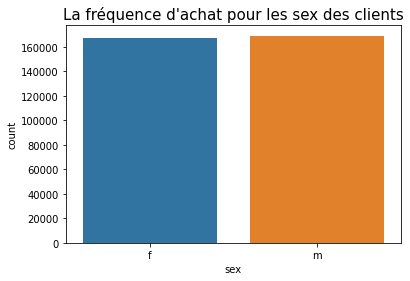

In [38]:
sns.countplot(x='sex',data=data_final1)
plt.title("La fréquence d'achat pour les sex des clients", size=15)

In [39]:
# La fréquence d'achats selon les produits
display (Markdown('Le nombre d achat selon l id_prod par ordre décroissant <span style="color: #ff0000">(sex)</span>'))
freq = pd.crosstab(data_final1['id_prod'], 'freq').rename_axis(None, axis=1).sort_values(by='freq', ascending=False).head()
freq

Le nombre d achat selon l id_prod par ordre décroissant <span style="color: #ff0000">(sex)</span>

,freq
id_prod,
1_369,1081
1_417,1062
1_498,1036
1_414,1027
1_425,1013


In [40]:
# La fréquence d'achats selon les produits
display (Markdown('Le nombre d achat selon le sex par ordre décroissant <span style="color: #ff0000">(sex)</span>'))
pd.crosstab(data_final1['mois_object'], 'freq').rename_axis(None, axis=1).sort_values(by='freq', ascending=False)

Le nombre d achat selon le sex par ordre décroissant <span style="color: #ff0000">(sex)</span>

,freq
mois_object,
septembre,33254
décembre,32417
février,29556
janvier,29311
mars,28559
avril,28401
novembre,28267
mai,28237
juin,26812


Text(0.5, 1.0, "La fréquence d'achat par mois ")

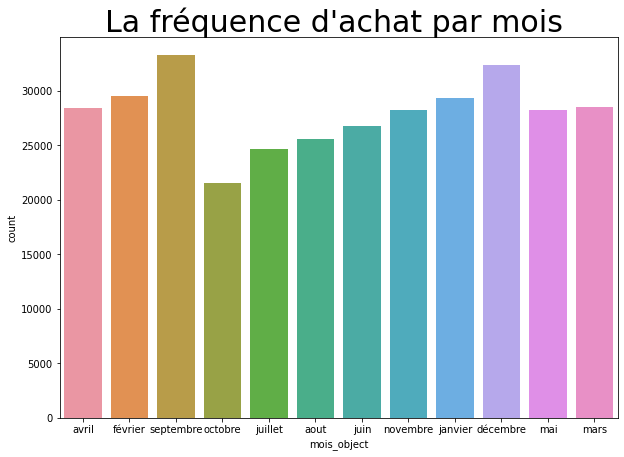

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x='mois_object',data=data_final1)
plt.title("La fréquence d'achat par mois ", size=30)

In [42]:
display (Markdown('Le nombre d achat selon la tranche_age par ordre décroissant <span style="color: #ff0000">(sex)</span>'))
pd.crosstab(data_final1['tranche_age'], 'freq').rename_axis(None, axis=1).sort_values(by='freq', ascending=False)

Le nombre d achat selon la tranche_age par ordre décroissant <span style="color: #ff0000">(sex)</span>

,freq
tranche_age,
30-50 ans,205768
50-93ans,84867
17-30 ans,46078


Text(0.5, 1.0, "La fréquence d'achat par tranches age ")

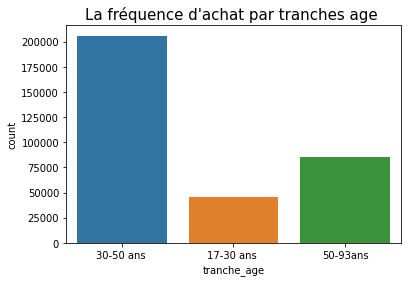

In [43]:
sns.countplot(x='tranche_age',data=data_final1)
plt.title("La fréquence d'achat par tranches age ", size=15)

# Séries temporelles

In [44]:
# Déplacer datetime sur l'index
datetime = data_final1.set_index('datetime')
datetime.head(2)

,id_prod,session_id,client_id,date,heure,annee,mois,jour,jour_semaine,price,categ,categ_object,sex,birth,sex_binaire,age,mois_object,tranche_age
datetime,,,,,,,,,,,,,,,,,,
2021-04-10,0_1483,s_18746,c_4450,2021-04-10 18:37:28,18,2021,4,10,samedi,4.99,0,categ0,f,1977,0,44,avril,30-50 ans
2022-02-03,2_226,s_159142,c_277,2022-02-03 01:55:53,1,2022,2,3,jeudi,65.75,2,categ2,f,2000,0,22,février,17-30 ans


In [45]:
# Le CA pour chaque mois de l'année
display (Markdown('Le CA pour chaque mois sur une période 12 mois <span style="color: #ff0000">(CA par mois)</span>'))
CA_par_mois = datetime.resample('M').sum()[['price']].reset_index().rename(columns={'price':'CA_mois'})
CA_par_mois.sort_values(by='datetime', ascending=True)


Le CA pour chaque mois sur une période 12 mois <span style="color: #ff0000">(CA par mois)</span>

,datetime,CA_mois
0,2021-03-31,479312.03
1,2021-04-30,472980.72
2,2021-05-31,489367.95
3,2021-06-30,481257.94
4,2021-07-31,480898.66
5,2021-08-31,479305.19
6,2021-09-30,502771.28
7,2021-10-31,319159.96
8,2021-11-30,512890.17
9,2021-12-31,522937.68


In [46]:
# Evolution Chiffre affaire ((Va-Vd)/Vd)*100 

CA_par_mois.loc[:,'%evolution_CA']= 0
for month in range(1,11) :
    CA_par_mois.iloc[month,2] = ((CA_par_mois.iloc[month,1]-CA_par_mois.iloc[month-1,1])/CA_par_mois.iloc[month-1,1])*100

In [47]:
#Fonction color négative colors
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [48]:
# Arrondir les valeurs
CA_par_mois['%evolution_CA'] = CA_par_mois['%evolution_CA'].round(2)

In [49]:
# # Evolution du CA par mois en %( rouge CA négatif) et colonne price CA par mois
# Evolution Chiffre affaire ((Va-Vd)/Vd)*100 
CA_par_mois.style.applymap(color_negative_red, subset=['%evolution_CA','price'])

/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,datetime,CA_mois,%evolution_CA
0,2021-03-31 00:00:00,479312,0
1,2021-04-30 00:00:00,472981,-1.32
2,2021-05-31 00:00:00,489368,3.46
3,2021-06-30 00:00:00,481258,-1.66
4,2021-07-31 00:00:00,480899,-0.07
5,2021-08-31 00:00:00,479305,-0.33
6,2021-09-30 00:00:00,502771,4.9
7,2021-10-31 00:00:00,319160,-36.52
8,2021-11-30 00:00:00,512890,60.7
9,2021-12-31 00:00:00,522938,1.96


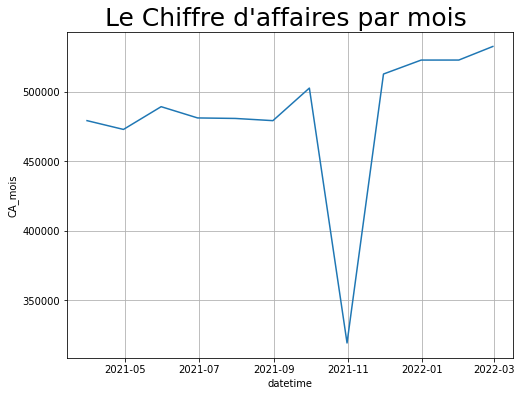

In [50]:
# Visualisation CA sur periode 12 mois
plt.figure(figsize=(8,6))
plt.title("Le Chiffre d'affaires par mois ", size=25)
sns.lineplot(x="datetime", y="CA_mois",
             data=CA_par_mois)
plt.grid(True)

# Anomalie catégorie 1 pour le mois octobre 

In [51]:
#Restriction pour le mois octobre 
octobre = data_final1[data_final1['mois']==10]
octobre.head(1)

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine,price,categ,categ_object,sex,birth,sex_binaire,age,mois_object,tranche_age
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17,3,2021,10,17,dimanche,4.2,0,categ0,m,1963,1,58,octobre,50-93ans


In [52]:
#La fréquence achat par catégories pour le mois octobre 
octobre.groupby('categ_object').count()[['price']].reset_index().rename(columns={'price':'freq_achat_octobre'})


,categ_object,freq_achat_octobre
0,categ0,18751
1,categ1,1666
2,categ2,1160


In [53]:
# Le CA par catégories pour le mois octobre 
octobre.groupby('categ_object').sum()[['price']].reset_index().rename(columns={'price':'CA_octobre'})



,categ_object,CA_octobre
0,categ0,199217.94
1,categ1,33762.32
2,categ2,86179.70


In [54]:
# Le CA catégorie0 par journée pour le mois octobre
categ0_octob= octobre[octobre['categ_object']=='categ0']
categ0_octob = categ0_octob.set_index('datetime')
montant_Day_categ0 = categ0_octob.resample('D').sum()[['price']].reset_index().rename(columns={'price':'CA_octobre_categ0'})
montant_Day_categ0

,datetime,CA_octobre_categ0
0,2021-10-01,6947.51
1,2021-10-02,7138.02
2,2021-10-03,6783.58
3,2021-10-04,6530.61
4,2021-10-05,6357.91
5,2021-10-06,7543.59
6,2021-10-07,6404.01
7,2021-10-08,7069.53
8,2021-10-09,6808.69
9,2021-10-10,6487.99


In [55]:
# Le CA catégorie1 par journée pour le mois octobre 
# Il y a des journées sans CA (anomalie) !!!!!!!!
categ1_octob= octobre[octobre['categ_object']=='categ1']
categ1_octob = categ1_octob.set_index('datetime')
montant_Day_categ1= categ1_octob.resample('D').sum()[['price']].reset_index().rename(columns={'price':'CA_octobre_categ1'})
montant_Day_categ1.head(31)

,datetime,CA_octobre_categ1
0,2021-10-01,7003.79
1,2021-10-02,0.00
2,2021-10-03,0.00
3,2021-10-04,0.00
4,2021-10-05,0.00
5,2021-10-06,0.00
6,2021-10-07,0.00
7,2021-10-08,0.00
8,2021-10-09,0.00
9,2021-10-10,0.00


In [56]:
# Il y a 26 journées avec un CA à 0 euros !!!!
montant_Day_categ1[montant_Day_categ1['CA_octobre_categ1']==0].count()

datetime             26
CA_octobre_categ1    26
dtype: int64

In [57]:
# Le CA catégorie2 par journée pour le mois octobre 
categ2_octob= octobre[octobre['categ_object']=='categ2']
categ2_octob = categ2_octob.set_index('datetime')
montant_Day_categ2= categ2_octob.resample('D').sum()[['price']].reset_index().rename(columns={'price':'CA_octobre_categ2'})
montant_Day_categ2

,datetime,CA_octobre_categ2
0,2021-10-01,2958.06
1,2021-10-02,1895.13
2,2021-10-03,2060.49
3,2021-10-04,2600.09
4,2021-10-05,3032.55
5,2021-10-06,1798.12
6,2021-10-07,1787.07
7,2021-10-08,3137.82
8,2021-10-09,2616.67
9,2021-10-10,2188.68


In [58]:
# dataframe CA journée octobre par catégorie 
df_octobre = montant_Day_categ0.merge(montant_Day_categ1, on='datetime', how='left')
df_Octobre = df_octobre.merge(montant_Day_categ2, on='datetime', how='left')
df_Octobre 

,datetime,CA_octobre_categ0,CA_octobre_categ1,CA_octobre_categ2
0,2021-10-01,6947.51,7003.79,2958.06
1,2021-10-02,7138.02,0.00,1895.13
2,2021-10-03,6783.58,0.00,2060.49
3,2021-10-04,6530.61,0.00,2600.09
4,2021-10-05,6357.91,0.00,3032.55
5,2021-10-06,7543.59,0.00,1798.12
6,2021-10-07,6404.01,0.00,1787.07
7,2021-10-08,7069.53,0.00,3137.82
8,2021-10-09,6808.69,0.00,2616.67
9,2021-10-10,6487.99,0.00,2188.68


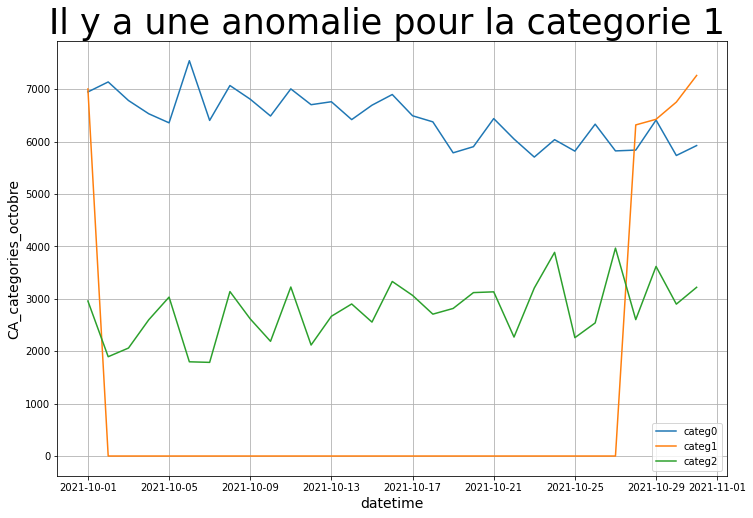

In [59]:
# Graphique pour montrer le comportement de la catégorie 1 (absence CA du 02/10/2021 au 27/10/2021 )
plt.figure(figsize=(12,8))
plt.title('Il y a une anomalie pour la categorie 1 ', size=35)
sns.lineplot(x="datetime", y="CA_octobre_categ0",data=df_Octobre, label='categ0')
sns.lineplot(x="datetime", y="CA_octobre_categ1",data=df_Octobre, label='categ1')
sns.lineplot(x="datetime", y="CA_octobre_categ2",data=df_Octobre, label='categ2')
plt.ylabel('CA_categories_octobre', size=14)
plt.xlabel('datetime', size=14)
plt.grid(True)

In [60]:
# Le chiffre affaire par mois pour la categ0
categ0=data_final1[data_final1['categ_object']=='categ0']
categ0= categ0.set_index('datetime')
categ0 = categ0.resample('M').sum()[['price']].reset_index()
categ0= categ0.rename(columns={'price':'CA_categ0'})
categ0

,datetime,CA_categ0
0,2021-03-31,193566.38
1,2021-04-30,205159.67
2,2021-05-31,196114.96
3,2021-06-30,167886.34
4,2021-07-31,144711.92
5,2021-08-31,167677.82
6,2021-09-30,246264.21
7,2021-10-31,199217.94
8,2021-11-30,155843.78
9,2021-12-31,205976.44


In [61]:
# Le chiffre affaire par mois pour la categ1
categ1=data_final1[data_final1['categ_object']=='categ1']
categ1= categ1.set_index('datetime')
categ1 = categ1.resample('M').sum()[['price']].reset_index()
categ1= categ1.rename(columns={'price':'CA_categ1'})
categ1

,datetime,CA_categ1
0,2021-03-31,186974.17
1,2021-04-30,156138.35
2,2021-05-31,165893.40
3,2021-06-30,189162.04
4,2021-07-31,188523.27
5,2021-08-31,162991.38
6,2021-09-30,190613.78
7,2021-10-31,33762.32
8,2021-11-30,252910.39
9,2021-12-31,251026.75


In [62]:
# Le chiffre affaire par mois pour la categ2
categ2=data_final1[data_final1['categ_object']=='categ2']
categ2= categ2.set_index('datetime')
categ2 =categ2.resample('M').sum()[['price']].reset_index()
categ2= categ2.rename(columns={'price':'CA_categ2'})
categ2

,datetime,CA_categ2
0,2021-03-31,98771.48
1,2021-04-30,111682.70
2,2021-05-31,127359.59
3,2021-06-30,124209.56
4,2021-07-31,147663.47
5,2021-08-31,148635.99
6,2021-09-30,65893.29
7,2021-10-31,86179.70
8,2021-11-30,104136.00
9,2021-12-31,65934.49


In [63]:
# Merge entre catégories
CA_categ=categ0.merge(categ1, on='datetime', how='left')
CA_categ1= CA_categ.merge(categ2,on='datetime', how='left' )
CA_categ1

,datetime,CA_categ0,CA_categ1,CA_categ2
0,2021-03-31,193566.38,186974.17,98771.48
1,2021-04-30,205159.67,156138.35,111682.70
2,2021-05-31,196114.96,165893.40,127359.59
3,2021-06-30,167886.34,189162.04,124209.56
4,2021-07-31,144711.92,188523.27,147663.47
5,2021-08-31,167677.82,162991.38,148635.99
6,2021-09-30,246264.21,190613.78,65893.29
7,2021-10-31,199217.94,33762.32,86179.70
8,2021-11-30,155843.78,252910.39,104136.00
9,2021-12-31,205976.44,251026.75,65934.49


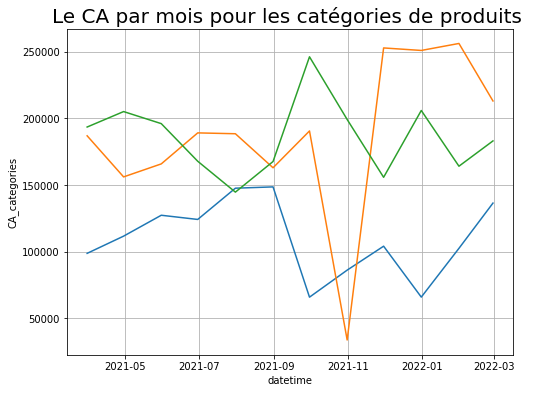

In [64]:
plt.figure(figsize=(8,6))
plt.title('Le CA par mois pour les catégories de produits ', size=20)
sns.lineplot(x="datetime", y="CA_categ2",data=categ2)
sns.lineplot(x="datetime", y="CA_categ1",data=categ1)
sns.lineplot(x="datetime", y="CA_categ0",data=categ0)
plt.ylabel('CA_categories')
plt.grid(True)

In [65]:
#Le CA des femmes par mois

f=data_final1[data_final1['sex']=='f']
f= f.set_index('datetime')
f = f.resample('M').sum()[['price']].reset_index().rename(columns={'price': 'CA_femme'})
f

,datetime,CA_femme
0,2021-03-31,234869.71
1,2021-04-30,235599.98
2,2021-05-31,244252.29
3,2021-06-30,235741.64
4,2021-07-31,235373.42
5,2021-08-31,235482.31
6,2021-09-30,246622.77
7,2021-10-31,154692.55
8,2021-11-30,255345.23
9,2021-12-31,258089.95


In [66]:
#Le CA des hommes par mois
m=data_final1[data_final1['sex']=='m']
m= m.set_index('datetime')
m = m.resample('M').sum()[['price']].reset_index().rename(columns={'price': 'CA_homme'})
m

,datetime,CA_homme
0,2021-03-31,244442.32
1,2021-04-30,237380.74
2,2021-05-31,245115.66
3,2021-06-30,245516.30
4,2021-07-31,245525.24
5,2021-08-31,243822.88
6,2021-09-30,256148.51
7,2021-10-31,164467.41
8,2021-11-30,257544.94
9,2021-12-31,264847.73


Text(0, 0.5, 'CA_femme_homme')

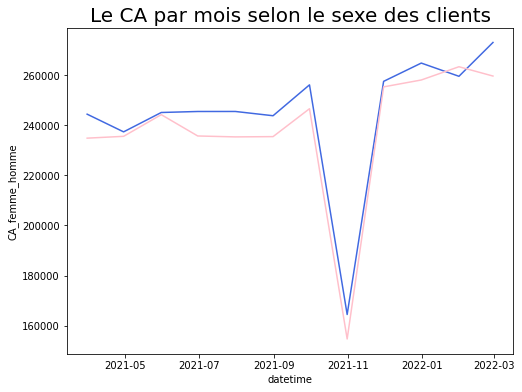

In [67]:
plt.figure(figsize=(8,6))
plt.title('Le CA par mois selon le sexe des clients', size=20)
sns.lineplot(x="datetime", y="CA_homme",color='royalblue',data=m)
sns.lineplot(x="datetime", y="CA_femme",color='pink', data=f)
plt.ylabel('CA_femme_homme')

In [68]:
#Le nombre de clients qui ont abouti à un achat par mois
clients_par_mois = datetime.resample('M').count()[['client_id']].reset_index().rename(columns={'client_id':'nbre_transactions'})
clients_par_mois

,datetime,nbre_transactions
0,2021-03-31,28559
1,2021-04-30,28401
2,2021-05-31,28237
3,2021-06-30,26812
4,2021-07-31,24712
5,2021-08-31,25610
6,2021-09-30,33254
7,2021-10-31,21577
8,2021-11-30,28267
9,2021-12-31,32417


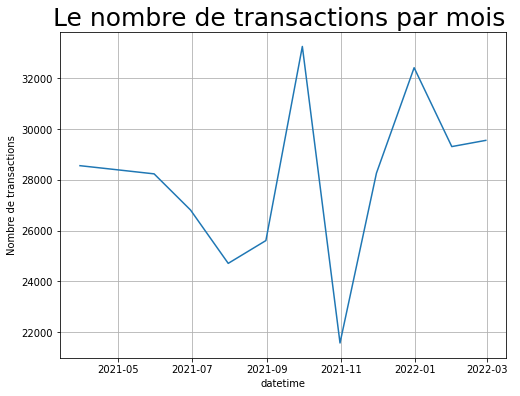

In [69]:
#Le nombre de clients qui ont abouti à un achat par mois
plt.figure(figsize=(8,6))
plt.title("Le nombre de transactions par mois ", size=25)
sns.lineplot(x="datetime", y="nbre_transactions",
             data=clients_par_mois)
plt.ylabel('Nombre de transactions')
plt.grid(True)

# Analyses bivariées (qualitative qualitative)

In [70]:
object_features.head()

,id_prod,session_id,client_id,jour_semaine,categ_object,sex,mois_object,tranche_age
0,0_1483,s_18746,c_4450,samedi,categ0,f,avril,30-50 ans
1,2_226,s_159142,c_277,jeudi,categ2,f,février,17-30 ans
2,1_374,s_94290,c_4270,jeudi,categ1,f,septembre,30-50 ans
3,0_2186,s_105936,c_4597,dimanche,categ0,m,octobre,50-93ans
4,0_1351,s_63642,c_1242,samedi,categ0,f,juillet,30-50 ans


In [71]:
#La fréquence d'achat du sex des clients par mois
objects = pd.crosstab(object_features['sex'],object_features['mois_object'])
objects

mois_object,aout,avril,décembre,février,janvier,juillet,juin,mai,mars,novembre,octobre,septembre
sex,,,,,,,,,,,,
f,12741,14255,16118,14852,14789,12271,13277,14180,14144,14032,10482,16374
m,12869,14146,16299,14704,14522,12441,13535,14057,14415,14235,11095,16880


Text(0.5, 1.0, "La fréquence d'achat du sex des clients par mois")

<Figure size 2880x2880 with 0 Axes>

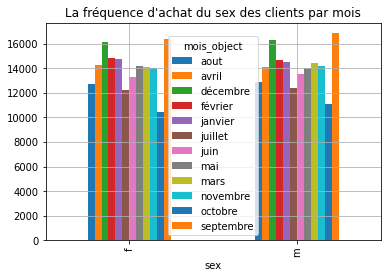

In [72]:
#La fréquence d'achat du sex des clients par mois
plt.figure(figsize=(40,40))
objects.plot.bar()
plt.grid(True)
plt.title("La fréquence d'achat du sex des clients par mois")

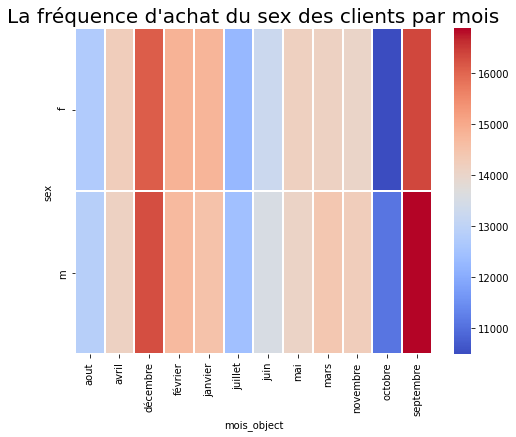

In [73]:
#La fréquence d'achat du sex des clients par mois
plt.figure(figsize=(8,6))
plt.title("La fréquence d'achat du sex des clients par mois", size=20)
sns.heatmap(objects, cmap='coolwarm', linecolor='white', linewidths=1)

In [74]:
# Teste si deux variables catégorielles sont liées ou indépendantes.


#H0: les deux échantillons sont indépendants.
#H1: il existe une dépendance entre les échantillons.

from scipy.stats import chi2_contingency
table = objects
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablement indépendant')
else:
	print('Probablement dépendant')
    
print("Conclusion: Il y a une relation entre le sex et le mois d'achat")

stat=30.162, p=0.001
Probablement dépendant
Conclusion: Il y a une relation entre le sex et le mois d'achat


In [75]:
#La fréquence d'achat des catégories selon les mois

objects = pd.crosstab(object_features['categ_object'],object_features['jour_semaine'])
objects

jour_semaine,dimanche,jeudi,lundi,mardi,mercredi,samedi,vendredi
categ_object,,,,,,,
categ0,29925,30059,30300,29685,30005,29614,29838
categ1,15388,15855,15965,15527,15418,15676,15906
categ2,2497,2514,2544,2505,2430,2477,2585


Text(0.5, 1.0, "La fréquence d'achat des catégories selon les jours semaine")

<Figure size 2880x2880 with 0 Axes>

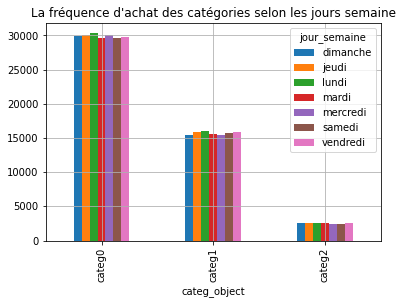

In [76]:
#La fréquence d'achat des catégories selon les mois
plt.figure(figsize=(40,40))
objects.plot.bar()
plt.grid(True)
plt.title("La fréquence d'achat des catégories selon les jours semaine")

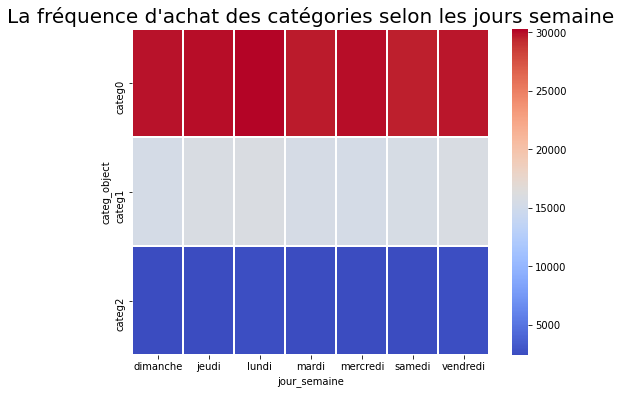

In [77]:
plt.figure(figsize=(8,6))
plt.title("La fréquence d'achat des catégories selon les jours semaine", size=20)
sns.heatmap(objects, cmap='coolwarm', linecolor='white', linewidths=1)

In [78]:
# Teste si deux variables catégorielles sont liées ou indépendantes.


#H0: les deux échantillons sont indépendants.
#H1: il existe une dépendance entre les échantillons.

from scipy.stats import chi2_contingency
table = objects
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablement indépendant')
else:
	print('Probablement dépendant')
    
print("Conclusion: Il n'y pas de relation entre les Catégories et les jours de la semaine")


stat=16.251, p=0.180
Probablement indépendant
Conclusion: Il n'y pas de relation entre les Catégories et les jours de la semaine


In [79]:
#La fréquence d'achat de la tranche d'age des clients par catégories
objects = pd.crosstab(object_features['tranche_age'],object_features['categ_object'])
objects

categ_object,categ0,categ1,categ2
tranche_age,,,
17-30 ans,13983,15928,16167
30-50 ans,157249,47946,573
50-93ans,38194,45861,812


Text(0.5, 1.0, "La fréquence d'achat de la tranche d'age des clients par catégories")

<Figure size 2880x2880 with 0 Axes>

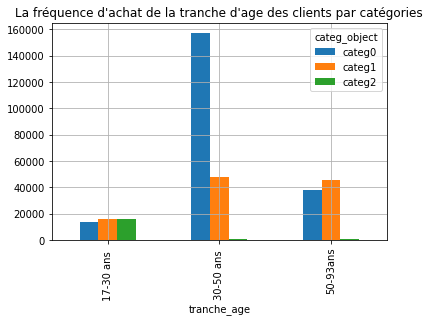

In [80]:
#La fréquence d'achat de la tranche d'age des clients par catégories
plt.figure(figsize=(40,40))
objects.plot.bar()
plt.grid(True)
plt.title("La fréquence d'achat de la tranche d'age des clients par catégories")

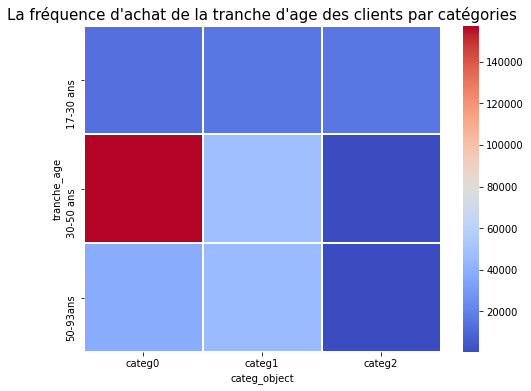

In [81]:
plt.figure(figsize=(8,6))
plt.title("La fréquence d'achat de la tranche d'age des clients par catégories", size=15)
sns.heatmap(objects, cmap='coolwarm', linecolor='white', linewidths=1)

In [82]:
# Teste si deux variables catégorielles sont liées ou indépendantes.

#H0: les deux échantillons sont indépendants.
#H1: il existe une dépendance entre les échantillons.

from scipy.stats import chi2_contingency

table = objects
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')
    
print("Conclusion: Il y a une relation entre la tranche d’âge des clients et les catégories de produits")


stat=127169.924, p=0.000
Probablement dépendant
Conclusion: Il y a une relation entre la tranche d’âge des clients et les catégories de produits


In [83]:
# Les produits vendus par tranches d'ages

objects = pd.crosstab(object_features['id_prod'],object_features['tranche_age'], margins=True)
objects

tranche_age,17-30 ans,30-50 ans,50-93ans,All
id_prod,,,,
0_0,43,450,118,611
0_1,13,198,38,249
0_10,0,10,2,12
0_100,0,2,0,2
0_1000,15,166,41,222
...,...,...,...,...
2_96,259,7,15,281
2_97,4,1,0,5
2_98,1,0,0,1


In [84]:
# Teste si deux variables catégorielles sont liées ou indépendantes.


#H0: les deux échantillons sont indépendants.
#H1: il existe une dépendance entre les échantillons.

from scipy.stats import chi2_contingency
table = objects
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablement indépendant')
else:
	print('Probablement dépendant')
    
print("Conclusion: Il y une relation entre les produits et les tranches d'ages")


stat=132113.221, p=0.000
Probablement dépendant
Conclusion: Il y une relation entre les produits et les tranches d'ages


# Analyse Bivariée quantitative quantitative

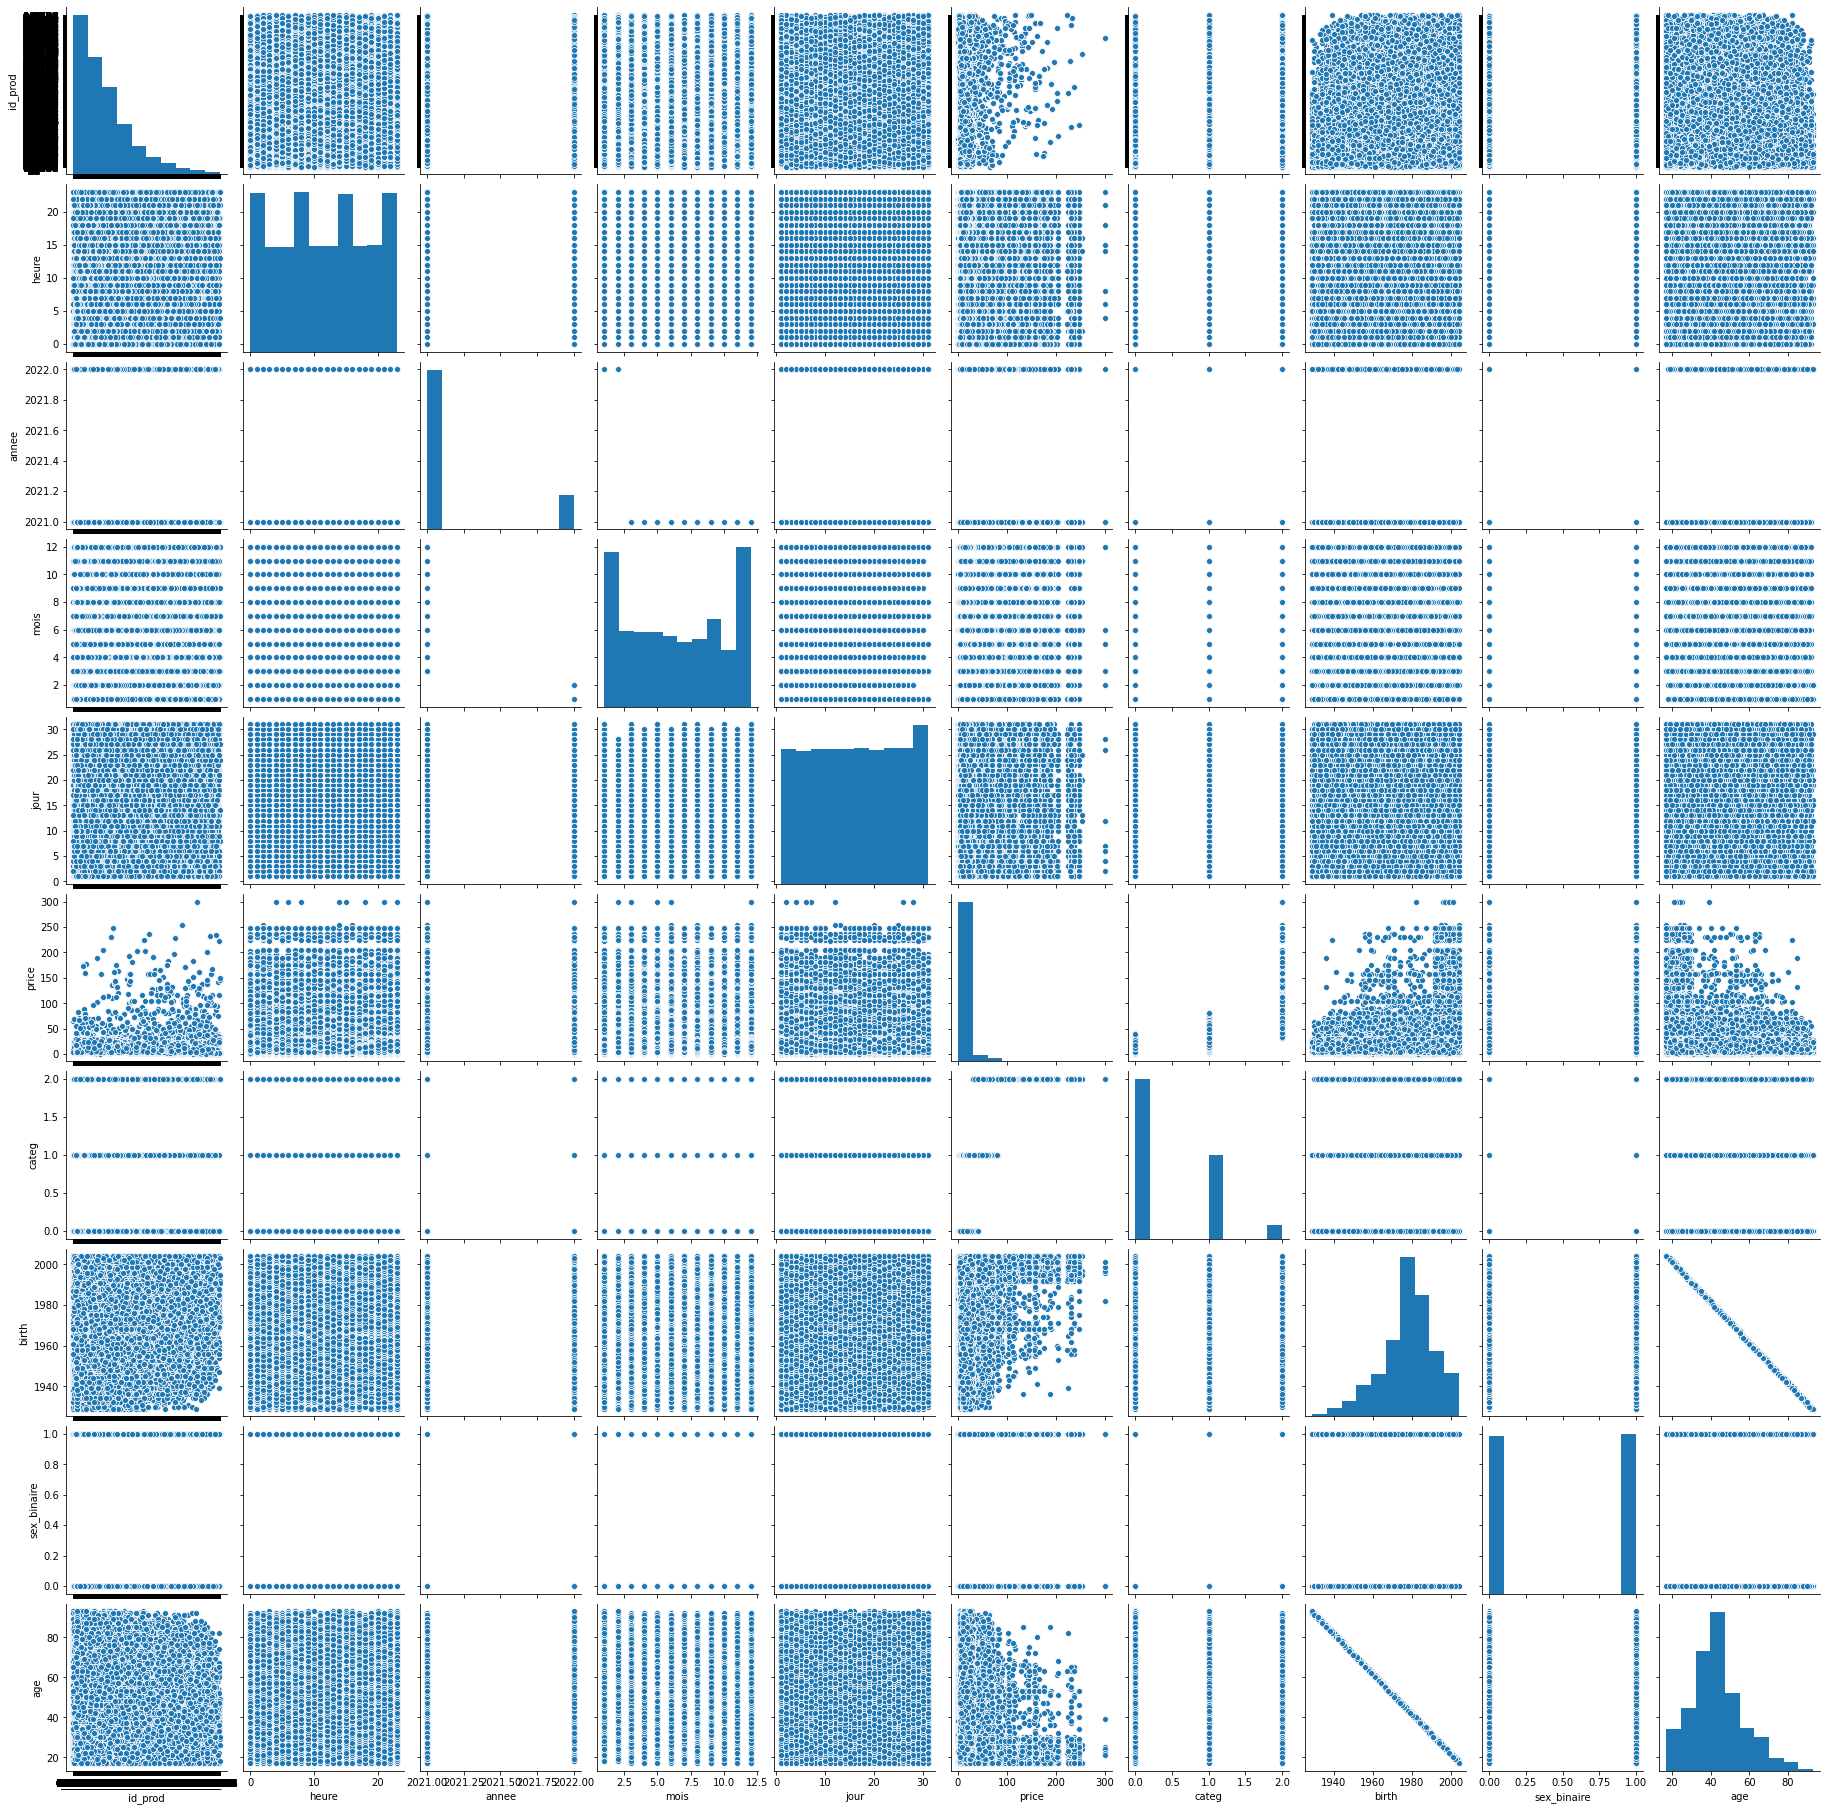

In [85]:
# Visualisation globale variables numériques
sns.pairplot(data_final1)


In [86]:
#matrice corrélation
corr = numerical_features.corr()
corr

,heure,annee,mois,jour,price,categ,birth,sex_binaire,age
heure,1.000000,0.001152,0.000469,0.000191,-0.000602,0.001182,-0.006134,-0.000799,0.006163
annee,0.001152,1.000000,-0.651247,-0.033173,0.018519,0.054330,-0.007503,-0.005546,0.035565
mois,0.000469,-0.651247,1.000000,0.030416,-0.023025,-0.036434,-0.004634,0.006025,-0.013648
jour,0.000191,-0.033173,0.030416,1.000000,0.000933,0.001832,0.001754,0.004376,-0.002684
price,-0.000602,0.018519,-0.023025,0.000933,1.000000,0.673359,0.211529,0.008210,-0.210882
categ,0.001182,0.054330,-0.036434,0.001832,0.673359,1.000000,0.098612,0.000689,-0.097028
birth,-0.006134,-0.007503,-0.004634,0.001754,0.211529,0.098612,1.000000,0.041264,-0.999606
sex_binaire,-0.000799,-0.005546,0.006025,0.004376,0.008210,0.000689,0.041264,1.000000,-0.041395
age,0.006163,0.035565,-0.013648,-0.002684,-0.210882,-0.097028,-0.999606,-0.041395,1.000000


Text(0.5, 1.0, 'Heatmap matrice corrélation')

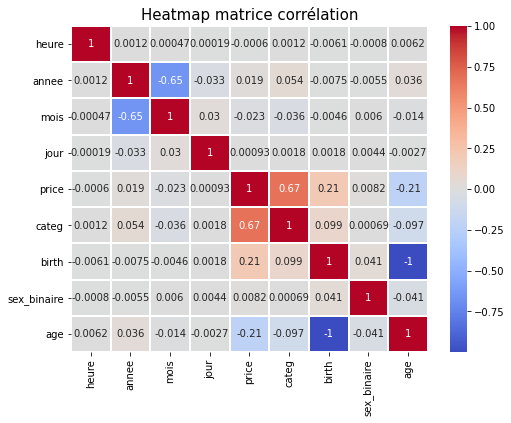

In [87]:
# Heatmap avec les coefficients de corrélation
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',  linecolor='white', linewidths=1 )
plt.title('Heatmap matrice corrélation', size=15 )

In [88]:
# Test normalité des données
# Teste si un échantillon de données a une distribution gaussienne pour price

#H0: l'échantillon a une distribution gaussienne.
#H1: l'échantillon n'a pas de distribution gaussienne.

from scipy.stats import shapiro
import scipy.stats
data = data_final1['price'].values
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("la distribution price est probalemement gaussien")
else:
    print("la distribution price n'est probalemement pas gaussien")

stat=0.550, p=0.000
la distribution price n'est probalemement pas gaussien


/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [89]:
#Teste si un échantillon de données a une distribution gaussienne avec normaltest
print(scipy.stats.normaltest(data_final1.price))
print("la distribution price n'est probalemement pas gaussien")

NormaltestResult(statistic=361678.28404274216, pvalue=0.0)
la distribution price n'est probalemement pas gaussien


5.479196379351585
45.425204844708766


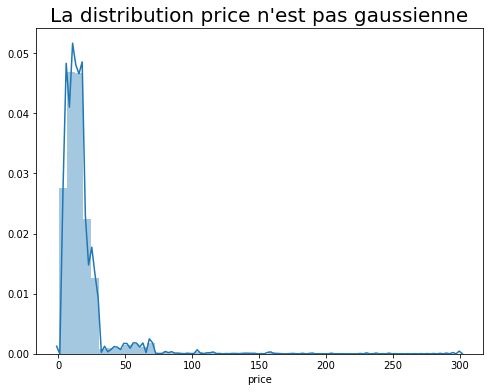

In [90]:
#La distribution price n'est pas gaussienne 
plt.figure(figsize=(8,6))
plt.title("La distribution price n'est pas gaussienne", size=20)
sns.distplot(data_final1['price'])
print(data_final1['price'].skew())
print(data_final1['price'].kurtosis())

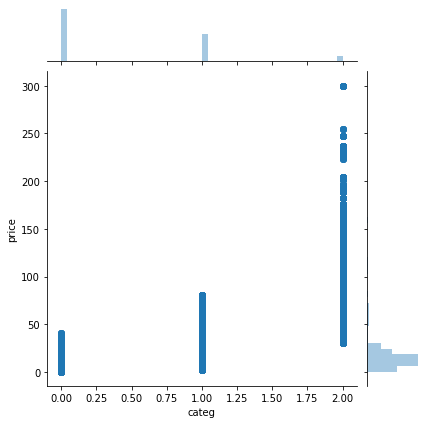

In [91]:
#Categorie0= + grande fréquence + petite dispersion , categorie 2= grande dispersion + petite fréquence achat
sns.jointplot(x='categ', y='price', data= data_final1)

In [92]:
#Le R carré 
0.67**2

0.4489000000000001

In [93]:
# Spearman correlation
numerical_features['categ'].corr(numerical_features['price'], method='spearman')

0.6814090229609403

In [94]:
#Kendall corrélation
numerical_features['categ'].corr(numerical_features['price'], method='kendall')

0.5695748867414195

In [95]:
# Teste si deux échantillons ont une relation linéaire.

from scipy.stats import pearsonr

#H0: les deux échantillons sont indépendants.
#H1: il existe une dépendance entre les échantillons.

data1 = numerical_features['categ'].values
data2 = numerical_features['price'].values
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probablement indépendant ')
else:

    print('Probablement dépendant ')
    
print("Conclusion: Il y une relation entre les prix et les catégories de produits ")


stat=0.673, p=0.000
Probablement dépendant 
Conclusion: Il y une relation entre les prix et les catégories de produits 


# Analyse bivariée quantitative et qualitative

In [96]:
# Le chiffre d'affaire 
datetime['price'].sum()

5796577.7700000005

In [97]:
# Le CA par tranches ages 

CA_tranche_age= data_final1.groupby('tranche_age').sum()[['price']].reset_index()
CA_tranche_age['price'].sum()
CA_tranche_age['%CA_tranche_age']=(CA_tranche_age['price']/5796577.7700000005)*100
CA_tranche_age.rename(columns={'price':'CA_tranche_age'})

,tranche_age,CA_tranche_age,%CA_tranche_age
0,17-30 ans,1.691484e+06,29.180738
1,30-50 ans,2.697829e+06,46.541755
2,50-93ans,1.407265e+06,24.277507


(-1.1125646076554807,
 1.12730555551054,
 -1.2310151775108198,
 1.1062388684458997)

<Figure size 720x864 with 0 Axes>

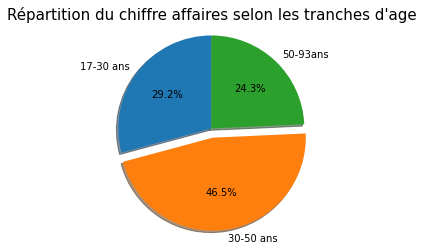

In [98]:
# Répartition du chiffre affaires selon la catégorie de produits
plt.figure(figsize=(10,12))
sizes = [ 29.180738,46.541755,24.277507]
explode = (0, 0.1, 0)
labels=['17-30 ans', '30-50 ans', '50-93ans']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
plt.title("Répartition du chiffre affaires selon les tranches d'age", size=15)
ax1.axis('equal') 

In [99]:
# Le CA par catégorie 
categ_CA= data_final1.groupby('categ').sum()[['price']].reset_index()
categ_CA['%_CA_categ']= (categ_CA['price']/5796577.7700000005)*100
categ_CA.rename(columns={'price':'CA_categ'})

,categ,CA_categ,%_CA_categ
0,0,2.229723e+06,38.466191
1,1,2.247384e+06,38.770883
2,2,1.319471e+06,22.762926


<Figure size 720x864 with 0 Axes>

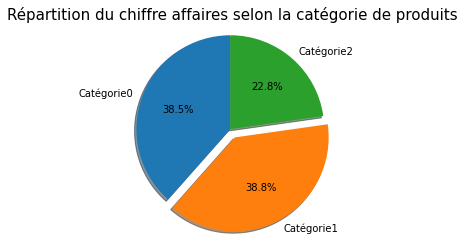

In [100]:
# Répartition du chiffre affaire selon la catégorie de produits
plt.figure(figsize=(10,12))
sizes = [38.46 ,38.77,22.76]
explode = (0, 0.1, 0)
labels=['Catégorie0', 'Catégorie1', 'Catégorie2']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
plt.title('Répartition du chiffre affaires selon la catégorie de produits', size=15)
ax1.axis('equal')  

plt.show()

In [101]:
object_features

,id_prod,session_id,client_id,jour_semaine,categ_object,sex,mois_object,tranche_age
0,0_1483,s_18746,c_4450,samedi,categ0,f,avril,30-50 ans
1,2_226,s_159142,c_277,jeudi,categ2,f,février,17-30 ans
2,1_374,s_94290,c_4270,jeudi,categ1,f,septembre,30-50 ans
3,0_2186,s_105936,c_4597,dimanche,categ0,m,octobre,50-93ans
4,0_1351,s_63642,c_1242,samedi,categ0,f,juillet,30-50 ans
...,...,...,...,...,...,...,...,...
336708,1_671,s_40720,c_3454,vendredi,categ1,m,mai,50-93ans
336709,0_759,s_50568,c_6268,samedi,categ0,m,juin,17-30 ans
336710,0_1256,s_7219,c_4137,mardi,categ0,f,mars,50-93ans
336711,2_227,s_112349,c_5,samedi,categ2,f,octobre,17-30 ans


In [102]:
numerical_features

,heure,annee,mois,jour,price,categ,birth,sex_binaire,age
0,18,2021,4,10,4.99,0,1977,0,44
1,1,2022,2,3,65.75,2,2000,0,22
2,15,2021,9,23,10.71,1,1979,0,42
3,3,2021,10,17,4.20,0,1963,1,58
4,20,2021,7,17,8.99,0,1980,0,41
...,...,...,...,...,...,...,...,...,...
336708,12,2021,5,28,31.99,1,1969,1,52
336709,0,2021,6,19,22.99,0,1991,1,30
336710,17,2021,3,16,11.03,0,1968,0,53
336711,16,2021,10,30,50.99,2,1994,0,27


In [103]:
# Les meilleurs produits vendus par ordre décroissant
Top_prod = data_final1[['id_prod', 'price']].groupby('id_prod').sum().reset_index().sort_values(by='price',ascending=False).rename(columns={'price':'CA_id_prod'})
TOP_prod = Top_prod.head(30)
TOP_prod


,id_prod,CA_id_prod
3069,2_135,33874.09
3044,2_112,31960.61
3033,2_102,28919.46
3151,2_209,27296.10
3042,2_110,27016.50
2590,1_369,25933.19
2618,1_395,25830.09
3103,2_166,25534.44
3205,2_43,25266.39
3200,2_39,25225.65


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

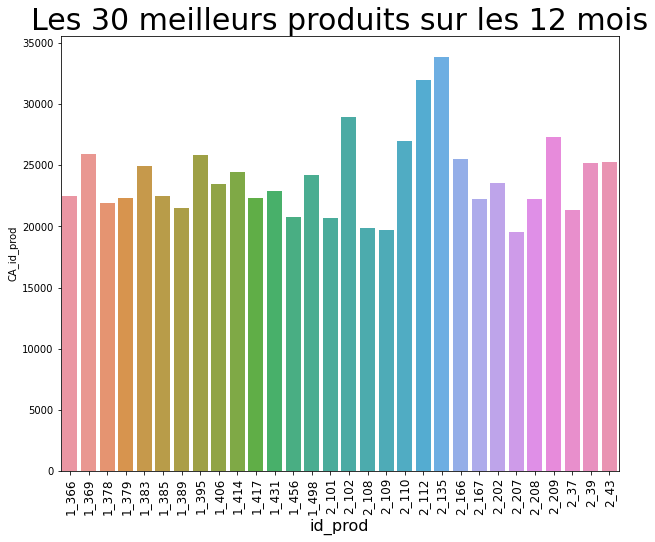

In [104]:
# Les meilleurs produits vendus 
plt.figure(figsize=(10,8))
sns.barplot(x= 'id_prod', y= 'CA_id_prod', data=TOP_prod)
plt.title('Les 30 meilleurs produits sur les 12 mois', size=30)
plt.xlabel("id_prod",fontsize=16)
plt.xticks(fontsize=12, rotation=90)

In [105]:
#Le CA sur les jours de la semaines sur les 12 mois
CA_jour_sem1 = data_final1[['jour_semaine', 'price']].groupby('jour_semaine').sum().reset_index().rename(columns={'price':'CA_jour_sem'})
CA_jour_sem1.sort_values(by='CA_jour_sem', ascending=False)


,jour_semaine,CA_jour_sem
2,lundi,842865.98
6,vendredi,838006.91
1,jeudi,830571.97
3,mardi,824991.60
0,dimanche,821222.15
5,samedi,820771.12
4,mercredi,818148.04


Text(0.5, 1.0, 'Le CA pour chaque jours de la semaine')

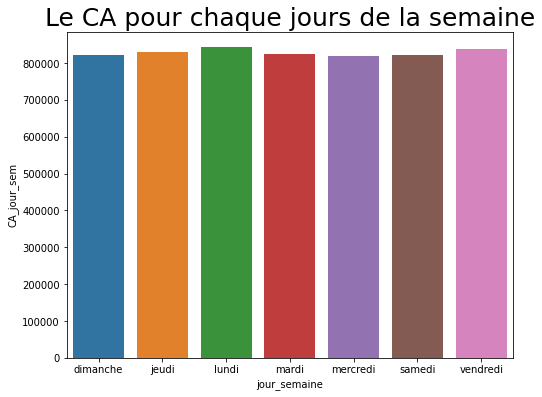

In [106]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'jour_semaine', y= 'CA_jour_sem', data=CA_jour_sem1)
plt.title('Le CA pour chaque jours de la semaine', size=25)

Text(0.5, 1.0, 'Les 3 populations sont différentes')

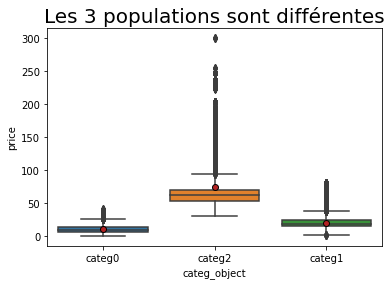

In [107]:
# Utilisation du sous-échantillon (sans les 4 clients outliers atypiques)
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
sns.boxplot(x="categ_object", y="price", showmeans=True, meanprops=meanprops,
            data=data_final2)
plt.title("Les 3 populations sont différentes", size=20)

In [108]:
#Projections sex et categ
df = data_final2[['price', 'categ_object']]
df.head()

,price,categ_object
0,4.99,categ0
1,65.75,categ2
2,10.71,categ1
3,4.20,categ0
4,8.99,categ0


In [109]:
#Les valeurs uniques de colonne categ_object
grps = pd.unique(df['categ_object'].values)
grps

# création dictionnaire entre categ_object et price
d_data = {grp:df['price'][df.categ_object == grp].values for grp in grps}
d_data

{'categ0': array([ 4.99,  4.2 ,  8.99, ..., 11.99, 22.99, 11.03]),
 'categ2': array([ 65.75,  68.99,  54.87, ...,  41.31, 181.99,  50.99]),
 'categ1': array([10.71, 23.99, 14.99, ..., 23.2 , 17.99, 23.37])}

In [110]:
#Teste anova si les moyennes de deux échantillons indépendants ou plus sont significativement différentes.
#H0: les moyennes des échantillons sont égales.
#H1: une ou plusieurs des moyennes des échantillons sont inégales.

stat, p = stats.f_oneway(d_data['categ0'], d_data['categ1'],  d_data['categ2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('les 3 populations sont significativements les memes')
else:
    print('les 3 populations sont significativements différentes')
    
 

stat=281121.224, p=0.000
les 3 populations sont significativements différentes


In [111]:
#teste pingouin pour trouver  eta carré
import pingouin as pg
aov = pg.anova(data=df, dv='price', between='categ_object', detailed=True, effsize='n2')
print(aov)

         Source            SS      DF            MS              F  p-unc  \
0  categ_object  6.233052e+07       2  3.116526e+07  281121.224016    0.0   
1        Within  3.476022e+07  313549  1.108606e+02            NaN    NaN   

         n2  
0  0.641982  
1       NaN  


/Users/stephaneea/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [112]:
# Eta carré
aov['n2'][0]
#une corrélation de 0.12 sur echelle de 0 à 1

0.641982117198657

In [113]:
print("Conclusion: Il y a une corrélation entre les prix et les catégories de produits achetés")

Conclusion: Il y a une corrélation entre les prix et les catégories de produits achetés


In [114]:
# Le CA par sex des clients 
data_final1.groupby('sex').sum()[['price']].rename(columns={'price':'CA/sex'}).reset_index()

,sex,CA/sex
0,f,2.859122e+06
1,m,2.937456e+06


In [115]:
#Le CA par catégorie selon le sexe feminin
f= data_final1[data_final1['sex']=='f']
f = f.groupby('categ_object').sum()[['price']].reset_index().rename(columns={'price':'CA_femme/categ'})
f

,categ_object,CA_femme/categ
0,categ0,1103465.97
1,categ1,1137856.49
2,categ2,617799.31


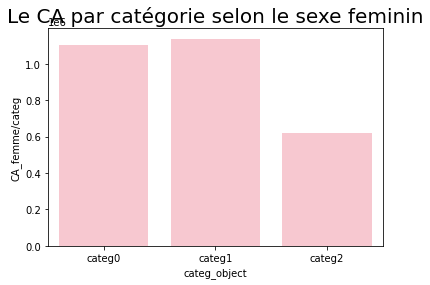

In [116]:
plt.title('Le CA par catégorie selon le sexe feminin', size=20)
sns.barplot(x= 'categ_object', y= 'CA_femme/categ',color='pink', data=f)

In [117]:
#Le CA par catégorie selon le sexe masculin
m = data_final1[data_final1['sex']=='m']
m = m.groupby('categ_object').sum()[['price']].reset_index().rename(columns={'price':'CA_homme/categ'})
m

,categ_object,CA_homme/categ
0,categ0,1126256.68
1,categ1,1109527.92
2,categ2,701671.40


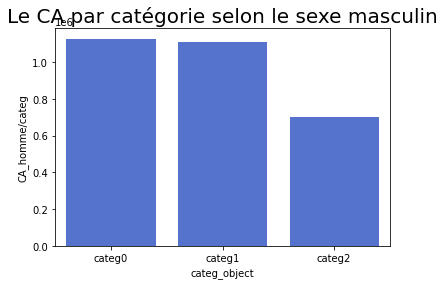

In [118]:
plt.title('Le CA par catégorie selon le sexe masculin', size=20)
sns.barplot(x= 'categ_object', y= 'CA_homme/categ',color='royalblue', data=m)

In [119]:
# Le CA pour les tranches age par mois 
pivot_t = data_final1.pivot_table(values= 'price', index='mois_object', columns='tranche_age',aggfunc=np.sum )
pivot_t

tranche_age,17-30 ans,30-50 ans,50-93ans
mois_object,,,
aout,176897.50,198747.59,103660.10
avril,140716.69,224866.29,107397.74
décembre,110489.27,266858.84,145589.57
février,160905.82,237825.34,134009.72
janvier,135202.42,239575.26,148177.63
juillet,176519.09,192768.43,111611.14
juin,157632.07,209600.69,114025.18
mai,155212.21,224738.76,109416.98
mars,130803.57,230762.07,117746.39


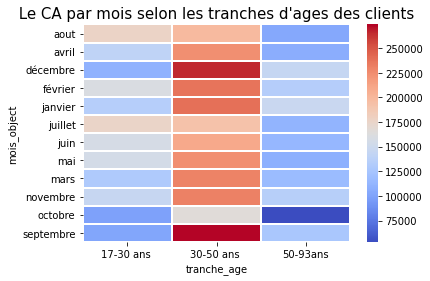

In [120]:
plt.title(" Le CA par mois selon les tranches d'ages des clients ", size=15)
sns.heatmap(pivot_t, cmap='coolwarm', linecolor='white', linewidths=1)

Text(0.5, 1.0, " Le CA par mois selon les tranches d'ages des clients ")

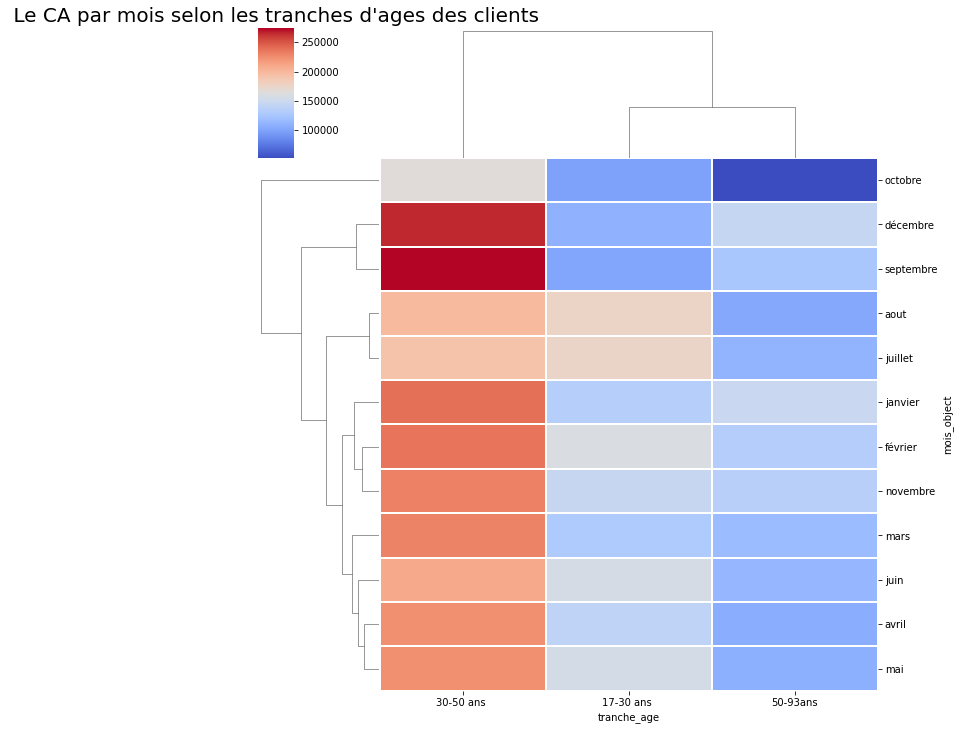

In [121]:
# la tranche d'age 30-50ans générent plus de CA ( décembre, septembre )

sns.clustermap(pivot_t, cmap= 'coolwarm', linecolor= 'white', linewidths=1)
plt.title(" Le CA par mois selon les tranches d'ages des clients ", size=20)

In [122]:
# Table pivot agg sum 
pivot_categ_tranche = data_final1.pivot_table(values= 'price', index='categ_object', columns='tranche_age',aggfunc=np.sum )
pivot_categ_tranche

tranche_age,17-30 ans,30-50 ans,50-93ans
categ_object,,,
categ0,149111.95,1.673487e+06,407123.34
categ1,326682.80,9.804521e+05,940249.47
categ2,1215689.45,4.388952e+04,59891.74


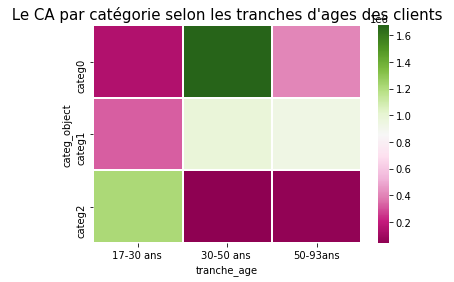

In [123]:
# La categ0 génére plus de CA avec la tranche 30-50ans

plt.title(" Le CA par catégorie selon les tranches d'ages des clients ", size=15)
sns.heatmap(pivot_categ_tranche, cmap='PiYG', linecolor='white', linewidths=1)